In [0]:
#A program that classifies images of birds
##########################################
#                                        #
#               @Cole_Hanson             #
#                                        #
##########################################
'''
 ^ ^
(O,O)
(   )
-"-"---dwb---------------------------------
'''

import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2


In [12]:
#Mount Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive"

Mounted at /content/drive
'Colab Notebooks'   data  'Getting started.pdf'


In [0]:
#Setup data to be read
DATA_DIR = "/content/drive/My Drive/data/train"
VALIDATION_DIR = "/content/drive/My Drive/data/validation"
CATEGORIES = ["american_goldfinch", "american_robin", "black-capped_chickadee", "cardinal", "cedar_waxwing","common_grackle", "downy_woodpecker", "house_finch", "house_wren", "mourning_dove", "read-headed_woodpecker", "ruby-throated_hummingbird", "white-breasted_nuthatch", "white-throated_sparrow"]

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_training_data():
    batch_size = 128
    epochs = 15
    IMG_HEIGHT = 64
    IMG_WIDTH = 64
    train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
    validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

    train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                  directory=DATA_DIR,
                                                  shuffle=True,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='categorical')
    
    return train_data_gen

In [0]:
def create_validation_data():
    batch_size = 128
    epochs = 15
    IMG_HEIGHT = 64
    IMG_WIDTH = 64
    train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
    validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

    validation_data = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                  directory=VALIDATION_DIR,
                                                  shuffle=True,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='categorical')
    
    return validation_data


Found 727 images belonging to 14 classes.


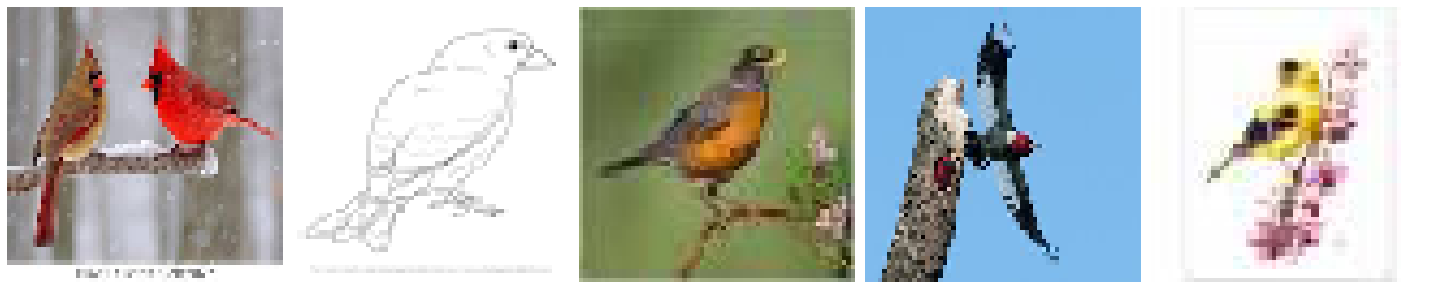

In [35]:
#test validation data
val = create_validation_data()
sample_validation_images, _ = next(training_data)
#visualize
plotImages(sample_validation_images[:5])


In [44]:
#test training
training_data = create_training_data()
m = len(training_data)
sample_training_images, _ = next(training_data)


Found 1885 images belonging to 14 classes.


In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#visualize
plotImages(sample_training_images[:5])

In [0]:
#create CNN model
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


In [41]:
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [48]:
#train

history = model.fit_generator(
    training_data,
    steps_per_epoch=128 // batch_size,
    epochs=epochs,
    validation_data=val,
    validation_steps= 64 // batch_size
)

Epoch 1/15


ValueError: ignored